# Gaussian mixture model of 2 Gaussians
$ f(x|\theta) = w f_1(x|\mu_1, \sigma_1^2) + (1-w) f_2(x|\mu_2, \sigma_2^2) $

Source: https://www.kaggle.com/charel/learn-by-example-expectation-maximization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import numpy as np
import numpy.random as npr
from scipy import stats
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform

### generate data

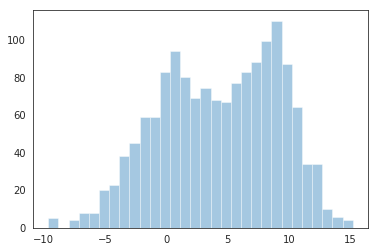

In [27]:
μ1, σ1 = 2, 4
μ2, σ2 = 9, 2

y1 = npr.normal(μ1, σ1, size=1000)
y2 = npr.normal(μ2, σ2, size=500)
data = np.append(y1, y2)

# PLOT IT
graph_min = min(data)
graph_max = max(data)

supp = np.linspace(graph_min, graph_max, 2000)

sns.distplot(data, bins=30, kde=False)
plt.show()

### model univariate Gaussian

Gaussian(4.27614, 4.81934)


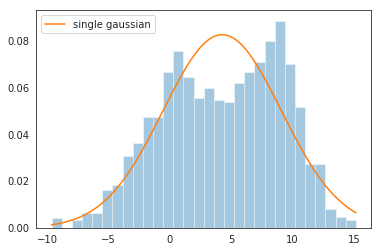

In [34]:
class Gaussian:
    
    def __init__(self, μ, σ):
        self.μ, self.σ = μ, σ
        
    def pdf(self, datum):
        μ, σ = self.μ, self.σ
        u = (datum-μ)/abs(σ)
        y = (1/(sqrt(2*pi)*abs(σ)))*exp(-u**2/2)
        return y
    
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.μ, self.σ)
    
best_single = Gaussian(data.mean(), data.std())
print(best_single)

# fit curve to data
g_single = stats.norm(best_single.μ, best_single.σ).pdf(supp)

sns.distplot(data, bins=30, kde=False, norm_hist=True)
plt.plot(supp, g_single, label='single gaussian')
plt.legend()
plt.show()

### using scikit

Gaussian 1: μ = 1.14, σ = 3.54, w = 0.59
Gaussian 2: μ = 8.71, σ = 2.18, w = 0.41


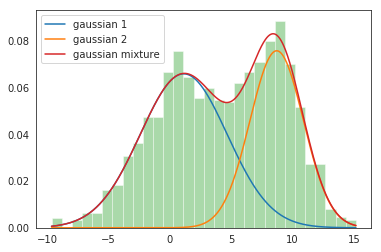

In [37]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, tol=1e-7)
gmm.fit(np.expand_dims(data,1))

nr = 1
for μ, σ, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print(f"Gaussian {nr}: μ = {μ:.2f}, σ = {σ:.2f}, w = {p:.2f}")
    g_s = stats.norm(μ, σ).pdf(supp)*p
    plt.plot(supp, g_s, label=f'gaussian {nr}')
    nr += 1
    
sns.distplot(data, bins=30, kde=False, norm_hist=True)

gmm_sum = np.exp([gmm.score_samples(e.reshape(-1,1)) for e in supp])
plt.plot(supp, gmm_sum, label='gaussian mixture')
plt.legend()
plt.show()